## Load dependencies

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import colorcet as cc
import pandas as pd
from ipyfilechooser import FileChooser
from linear2ac.io import get_main_data_folder
import zarr
import vr2p
import vr2p.signal

## Define and plot correlation matrix masks

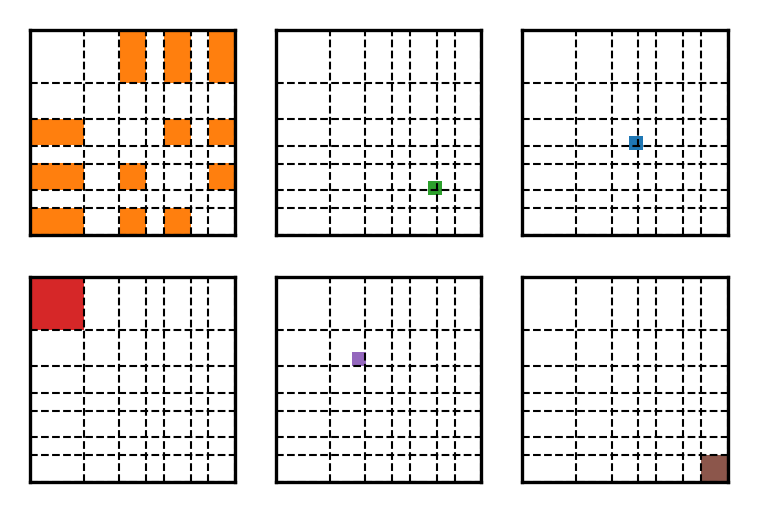

In [19]:
# Define the regions of interest
regions = [[0, 12], [20, 26], [30, 36], [40, 46]]
# Custom colors
colors = ['#ff7f0e', '#2ca02c', '#1f77b4','#d62728', '#9467bd', '#8c564b']


# Loop through each region and generate a heatmap subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3, 2), dpi=300)


# First plot with double loop
correlation_matrix_1 = np.zeros((46, 46))
for i, region_i in enumerate(regions):
    for j, region_j in enumerate(regions):
        if i !=j:
            for k in range(region_i[0], region_i[1]):
                for l in range(region_j[0], region_j[1]):
                    correlation_matrix_1[k, l] = 1
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[0]])

axs[0, 0].imshow(correlation_matrix_1, cmap=custom_cmap )
axs[0, 0].axis('on')
axs[0, 0].tick_params(axis='both', which='both', length=0)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].spines['top'].set_visible(True)
axs[0, 0].spines['right'].set_visible(True)
axs[0, 0].spines['bottom'].set_visible(True)
axs[0, 0].spines['left'].set_visible(True)



# Second plot with single region [30,36]
correlation_matrix_2 = np.zeros((46, 46))
for i in range(34, 37): #34-39 original
    for j in range(34, 37):
         #if i == j:
            correlation_matrix_2[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[1]])

axs[0, 1].imshow(correlation_matrix_2, cmap=custom_cmap)
axs[0, 1].axis('on')
axs[0, 1].tick_params(axis='both', which='both', length = 0)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].spines['top'].set_visible(True)
axs[0, 1].spines['right'].set_visible(True)
axs[0, 1].spines['bottom'].set_visible(True)
axs[0, 1].spines['left'].set_visible(True)



# Third plot with single region [20,26]
correlation_matrix_3 = np.zeros((46, 46))
for i in range(24, 27): # 24-29 original
    for j in range(24, 27):
         #if i == j:
            correlation_matrix_3[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[2]])

axs[0, 2].imshow(correlation_matrix_3, cmap=custom_cmap)
axs[0, 2].axis('on')
axs[0, 2].tick_params(axis='both', which='both', length=0)
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])
axs[0, 2].spines['top'].set_visible(True)
axs[0, 2].spines['right'].set_visible(True)
axs[0, 2].spines['bottom'].set_visible(True)
axs[0, 2].spines['left'].set_visible(True)




# Fourth plot with single region [0,12]
correlation_matrix_4 = np.zeros((46, 46))
for i in range(0, 12):
    for j in range(0, 12):
        # if i == j::
            correlation_matrix_4[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[3]])

axs[1, 0].imshow(correlation_matrix_4, cmap=custom_cmap)
axs[1, 0].axis('on')
axs[1, 0].tick_params(axis='both', which='both', length=0)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].spines['top'].set_visible(True)
axs[1, 0].spines['right'].set_visible(True)
axs[1, 0].spines['bottom'].set_visible(True)
axs[1, 0].spines['left'].set_visible(True)


# Fifth plot with single region [12,20]
                
correlation_matrix_5 = np.zeros((46, 46))
for i in range(17, 20):
    for j in range(17, 20):
        # if i == j::
            correlation_matrix_5[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[4]])

axs[1, 1].imshow(correlation_matrix_5, cmap=custom_cmap)
axs[1, 1].axis('on')
axs[1, 1].tick_params(axis='both', which='both', length=0)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].spines['top'].set_visible(True)
axs[1, 1].spines['right'].set_visible(True)
axs[1, 1].spines['bottom'].set_visible(True)
axs[1, 1].spines['left'].set_visible(True)




# Sixth plot with single region [40,46]
correlation_matrix_6 = np.zeros((46, 46))
for i in range(40, 46):
    for j in range(40, 46):
        # if i == j::
            correlation_matrix_6[i, j] = 1
        
# Create custom colormap for each subplot
custom_cmap = ListedColormap(['white', colors[5]])

axs[1, 2].imshow(correlation_matrix_6, cmap=custom_cmap)
axs[1, 2].axis('on')
axs[1, 2].tick_params(axis='both', which='both', length=0)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])
axs[1, 2].spines['top'].set_visible(True)
axs[1, 2].spines['right'].set_visible(True)
axs[1, 2].spines['bottom'].set_visible(True)
axs[1, 2].spines['left'].set_visible(True)


# Add vertical and horizontal lines around each region
for i, region in enumerate(regions):
    for ax in axs.flatten():
        ax.axvline(x=region[0]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(x=region[1]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axhline(y=region[0]-0.5, color='black', linewidth=0.5, linestyle='--')
        ax.axhline(y=region[1]-0.5, color='black', linewidth=0.5, linestyle='--')

plt.show()


## load pre-computed place field data and calculate correlation matrices

In [ ]:
from scipy.spatial.distance import cosine

all_day_cosine_angle = []

for anm_n, name in enumerate(names):
    # load data.
    path = f'/.../Tyche/vr2p_datasets/Set A/{name}/'
    print(path)
    
    data = vr2p.ExperimentData(path)
    # Generate index for days animal is performing Cue Set A only.
    day_count = []

    for i in range(len(data.signals.multi_session.F)):
        if ('Cue Set A' in data.vr[i].trial.set.unique()) and (len(data.vr[i].trial.set.unique()) == 1):
            day_count.append(i)
        else:
            break
    print(max(day_count))

    #load stored place field analysis for each day

    range_A = range(max(day_count) + 1)
    criteria = 'putative'

    zarr_file = zarr.open(f'/.../Tyche/vr2p_datasets/placefields/50_600_SetA/{name[0:8]}-PF.zarr', mode="r")

    binF_T1 = [zarr_file[f'Cue Set A/1/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]
    binF_T2 = [zarr_file[f'Cue Set A/2/excl_no_response/{i}/{criteria}'][()]['binF'] for i in range_A]

    binF_T1_all = np.array(binF_T1).T
    binF_T2_all = np.array(binF_T2).T
    
    cosine_angle_position_day = np.zeros((binF_T1_all.shape[2], binF_T1_all.shape[0], binF_T1_all.shape[0]))

    for day_num in range(binF_T1_all.shape[2]):
        for pos_bin in range(binF_T1_all.shape[0]):
            for pos_bin2 in range(binF_T1_all.shape[0]):
                cosine_similarity = 1 - cosine(binF_T1_all[pos_bin,:,day_num], binF_T2_all[pos_bin2,:,day_num])
                cosine_angle = np.arccos(cosine_similarity) * (180/np.pi) 
                cosine_angle_position_day[day_num, pos_bin, pos_bin2] = cosine_angle

    all_day_cosine_angle.append(cosine_angle_position_day)


## Plot correlation coefficient for key sections of the track over days

In [ ]:
cosine_angle_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3]
cosine_angle_matrices_2 = [correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]



labels_1 = ['Off Diag', 'Post R1', 'Post Ind']
labels_2 = ['Initial', 'Ind', 'End']
colors_1 = colors[0:3]
colors_2 = colors[3:]
all_masks_matrix = np.full((6, len(all_day_cosine_angle), 20), np.nan)

for session_n in range(len(all_day_cosine_angle)):
    cosine_angle_position_day = all_day_cosine_angle[session_n]

    # Set square aspect ratio for both plots
    fig, ax1 = plt.subplots(figsize=(3, 3), dpi=300)

    # Plot the first set of cosine angle matrices
    for i, mask in enumerate(cosine_angle_matrices_1):
        mask_array = np.zeros((cosine_angle_position_day.shape[0], cosine_angle_position_day.shape[1],
                               cosine_angle_position_day.shape[2]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(cosine_angle_position_day, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        ax1.plot(mean_values_array, 'o-', label=labels_1[i], color=colors_1[i])
        all_masks_matrix[i, session_n, 0:len(mean_values_array)] = mean_values_array

    ax1.set_ylim([0, 90])
    ax1.set_title(names[session_n])

    # Add legend and labels for the first plot
    ax1.legend(fontsize='x-small')
    ax1.set_xlabel('Session #')
    ax1.set_ylabel('Cosine Angle (Degrees)')
    ax1.set_xticks(np.arange(len(mean_values_array)))
    ax1.set_xticklabels(np.arange(1, len(mean_values_array) + 1))

    # Set square aspect ratio for both plots
    fig, ax2 = plt.subplots(figsize=(3, 3), dpi=300)

    # Plot the second set of cosine angle matrices
    for i, mask in enumerate(cosine_angle_matrices_2):
        mask_array = np.zeros((cosine_angle_position_day.shape[0], cosine_angle_position_day.shape[1],
                               cosine_angle_position_day.shape[2]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(cosine_angle_position_day, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        ax2.plot(mean_values_array, 'o-', label=labels_2[i], color=colors_2[i])
        all_masks_matrix[i + 3, session_n, 0:len(mean_values_array)] = mean_values_array

    # Set the y-axis limits to 0 to 90 for the second plot
    ax2.set_ylim([0, 90])

    # Add legend and labels for the second plot
    ax2.legend(fontsize='x-small')
    ax2.set_xlabel('Session #')
    ax2.set_ylabel('Cosine Angle (Degrees)')
    ax2.set_xticks(np.arange(len(mean_values_array)))
    ax2.set_xticklabels(np.arange(1, len(mean_values_array) + 1))


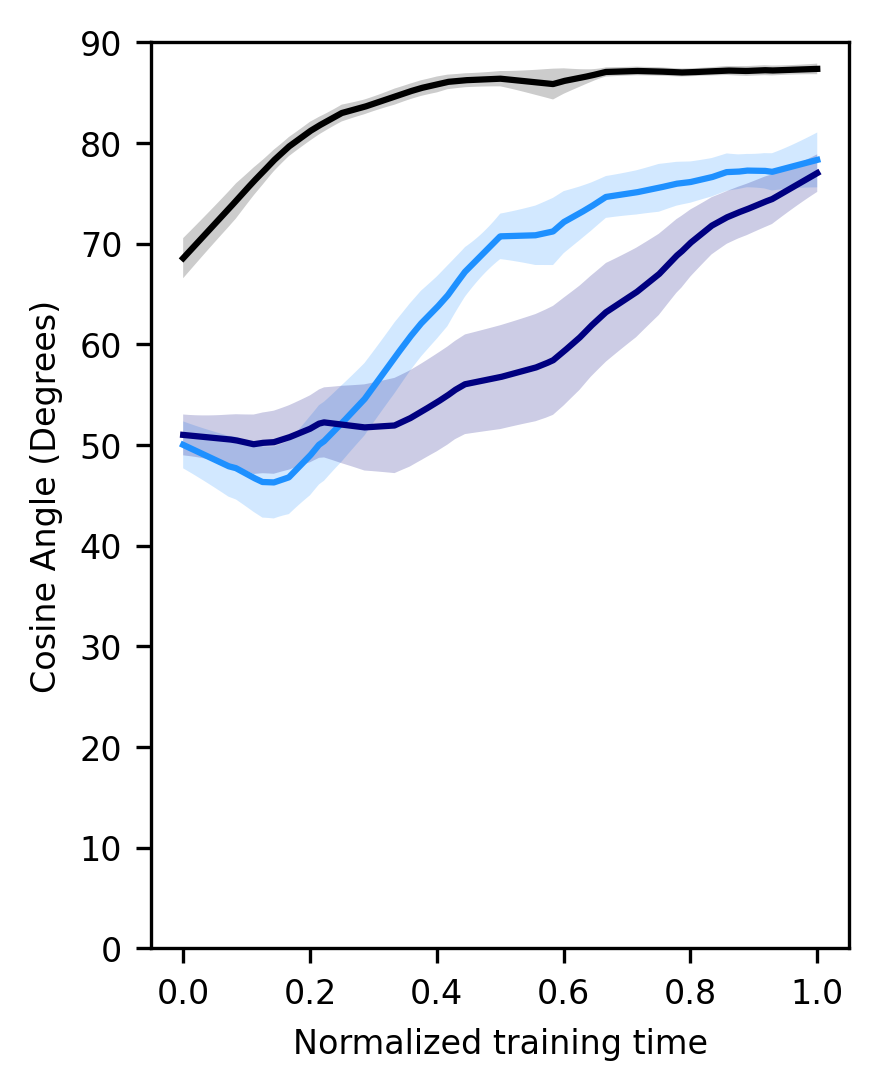

In [13]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy import stats

# Define x for new data
x_new = np.linspace(0, 1, 1000)  # 1000 is the new number of data points

# Function to replace nan values with interpolated values and return interpolated array
def interpolate_col(col):
    # Ignore nan values
    valid_mask = ~np.isnan(col)
    y = col[valid_mask]
    # Scale x to be between 0 and 1
    x = np.linspace(0, 1, len(y))
    # Interpolate
    f = interpolate.interp1d(x, y, kind='linear', fill_value="extrapolate", bounds_error=False)
    return f(x_new)

# Create a figure
plt.figure(figsize=(3, 4), dpi=300)
colors = ['black', 'dodgerblue','navy' ]  # Define the colors to use
animal_data_interps = []
legends = ['Off Diagonal', 'Pre-R2', 'Pre-R1']  # Define the legends

# Loop over the animals
for j in range(3):  
    # Your data
    animal_data = all_masks_matrix[j, :, :].T
    # Remove rows with all nan values
    animal_data = animal_data[~np.all(np.isnan(animal_data), axis=1)]
    # Apply the function to each column
    animal_data_interp = np.apply_along_axis(interpolate_col, 0, animal_data)
    animal_data_interps.append(animal_data_interp)
    # Calculate average and SEM
    average = np.mean(animal_data_interp, axis=1)
    sem = np.std(animal_data_interp, axis=1) / np.sqrt(animal_data_interp.shape[1])
    # Plotting average with SEM
    plt.plot(x_new, average, color=colors[j], linewidth=1.5, label=legends[j])
    plt.fill_between(x_new, average - sem, average + sem, color=colors[j], alpha=0.2, edgecolor="none")

# Show plot
plt.xlabel("Normalized training time", fontsize=8)
plt.ylabel("Cosine Angle (Degrees)", fontsize=8)  # updated y-label
plt.ylim(0,90)

# Increase axis tick font size
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig("Normalized_Averaged_CosineAngle_Plots.pdf", format='pdf', dpi=500, bbox_inches='tight')  # updated file name


#plt.legend()
plt.show()


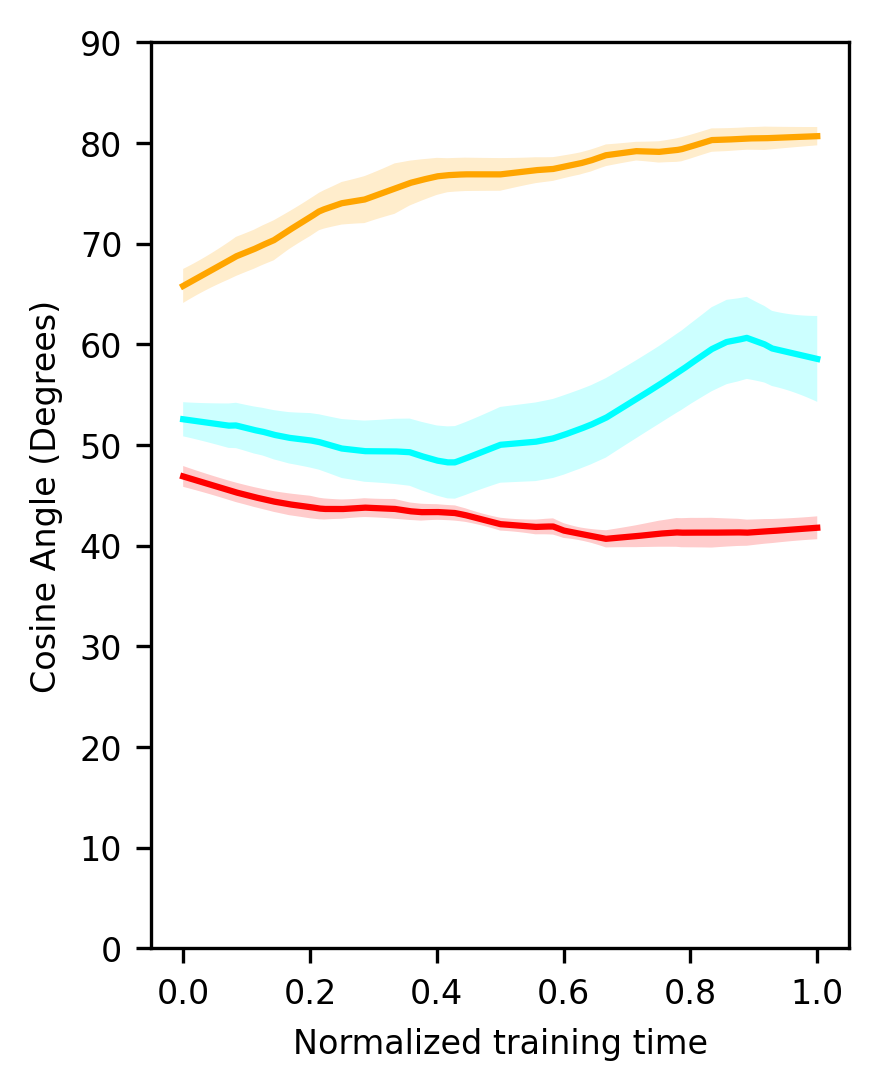

In [14]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy import stats

# Define x for new data
x_new = np.linspace(0, 1, 1000)  # 1000 is the new number of data points

# Function to replace nan values with interpolated values and return interpolated array
def interpolate_col(col):
    # Ignore nan values
    valid_mask = ~np.isnan(col)
    y = col[valid_mask]
    # Scale x to be between 0 and 1
    x = np.linspace(0, 1, len(y))
    # Interpolate
    f = interpolate.interp1d(x, y, kind='linear', fill_value="extrapolate", bounds_error=False)
    return f(x_new)

# Create a figure
plt.figure(figsize=(3, 4), dpi=300)

colors = ['red','orange','cyan'] # Define the colors to use
animal_data_interps = []
legends = ['Initial region', 'Indicator', 'Eng region']  # Define the legends

# Loop over the animals
for j in range(3):  # replace 3 with the number of animals you have
    # Your data
    animal_data = all_masks_matrix[j+3, :, :].T
    # Remove rows with all nan values
    animal_data = animal_data[~np.all(np.isnan(animal_data), axis=1)]
    # Apply the function to each column
    animal_data_interp = np.apply_along_axis(interpolate_col, 0, animal_data)
    animal_data_interps.append(animal_data_interp)
    # Calculate average and SEM
    average = np.mean(animal_data_interp, axis=1)
    sem = np.std(animal_data_interp, axis=1) / np.sqrt(animal_data_interp.shape[1])
    # Plotting average with SEM
    plt.plot(x_new, average, color=colors[j], linewidth=1.5, label=legends[j])
    plt.fill_between(x_new, average - sem, average + sem, color=colors[j], alpha=0.2, edgecolor="none")

# Show plot
plt.xlabel("Normalized training time",fontsize = 8)
plt.ylabel("Cosine Angle (Degrees)",fontsize = 8) # updated y-label
plt.ylim(0,90)

# Increase axis tick font size
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig("Normalized_Averaged_CosineAngle_Plots_2ndRow.pdf", format='pdf', dpi=500, bbox_inches='tight') # updated filename

#plt.legend()
plt.show()


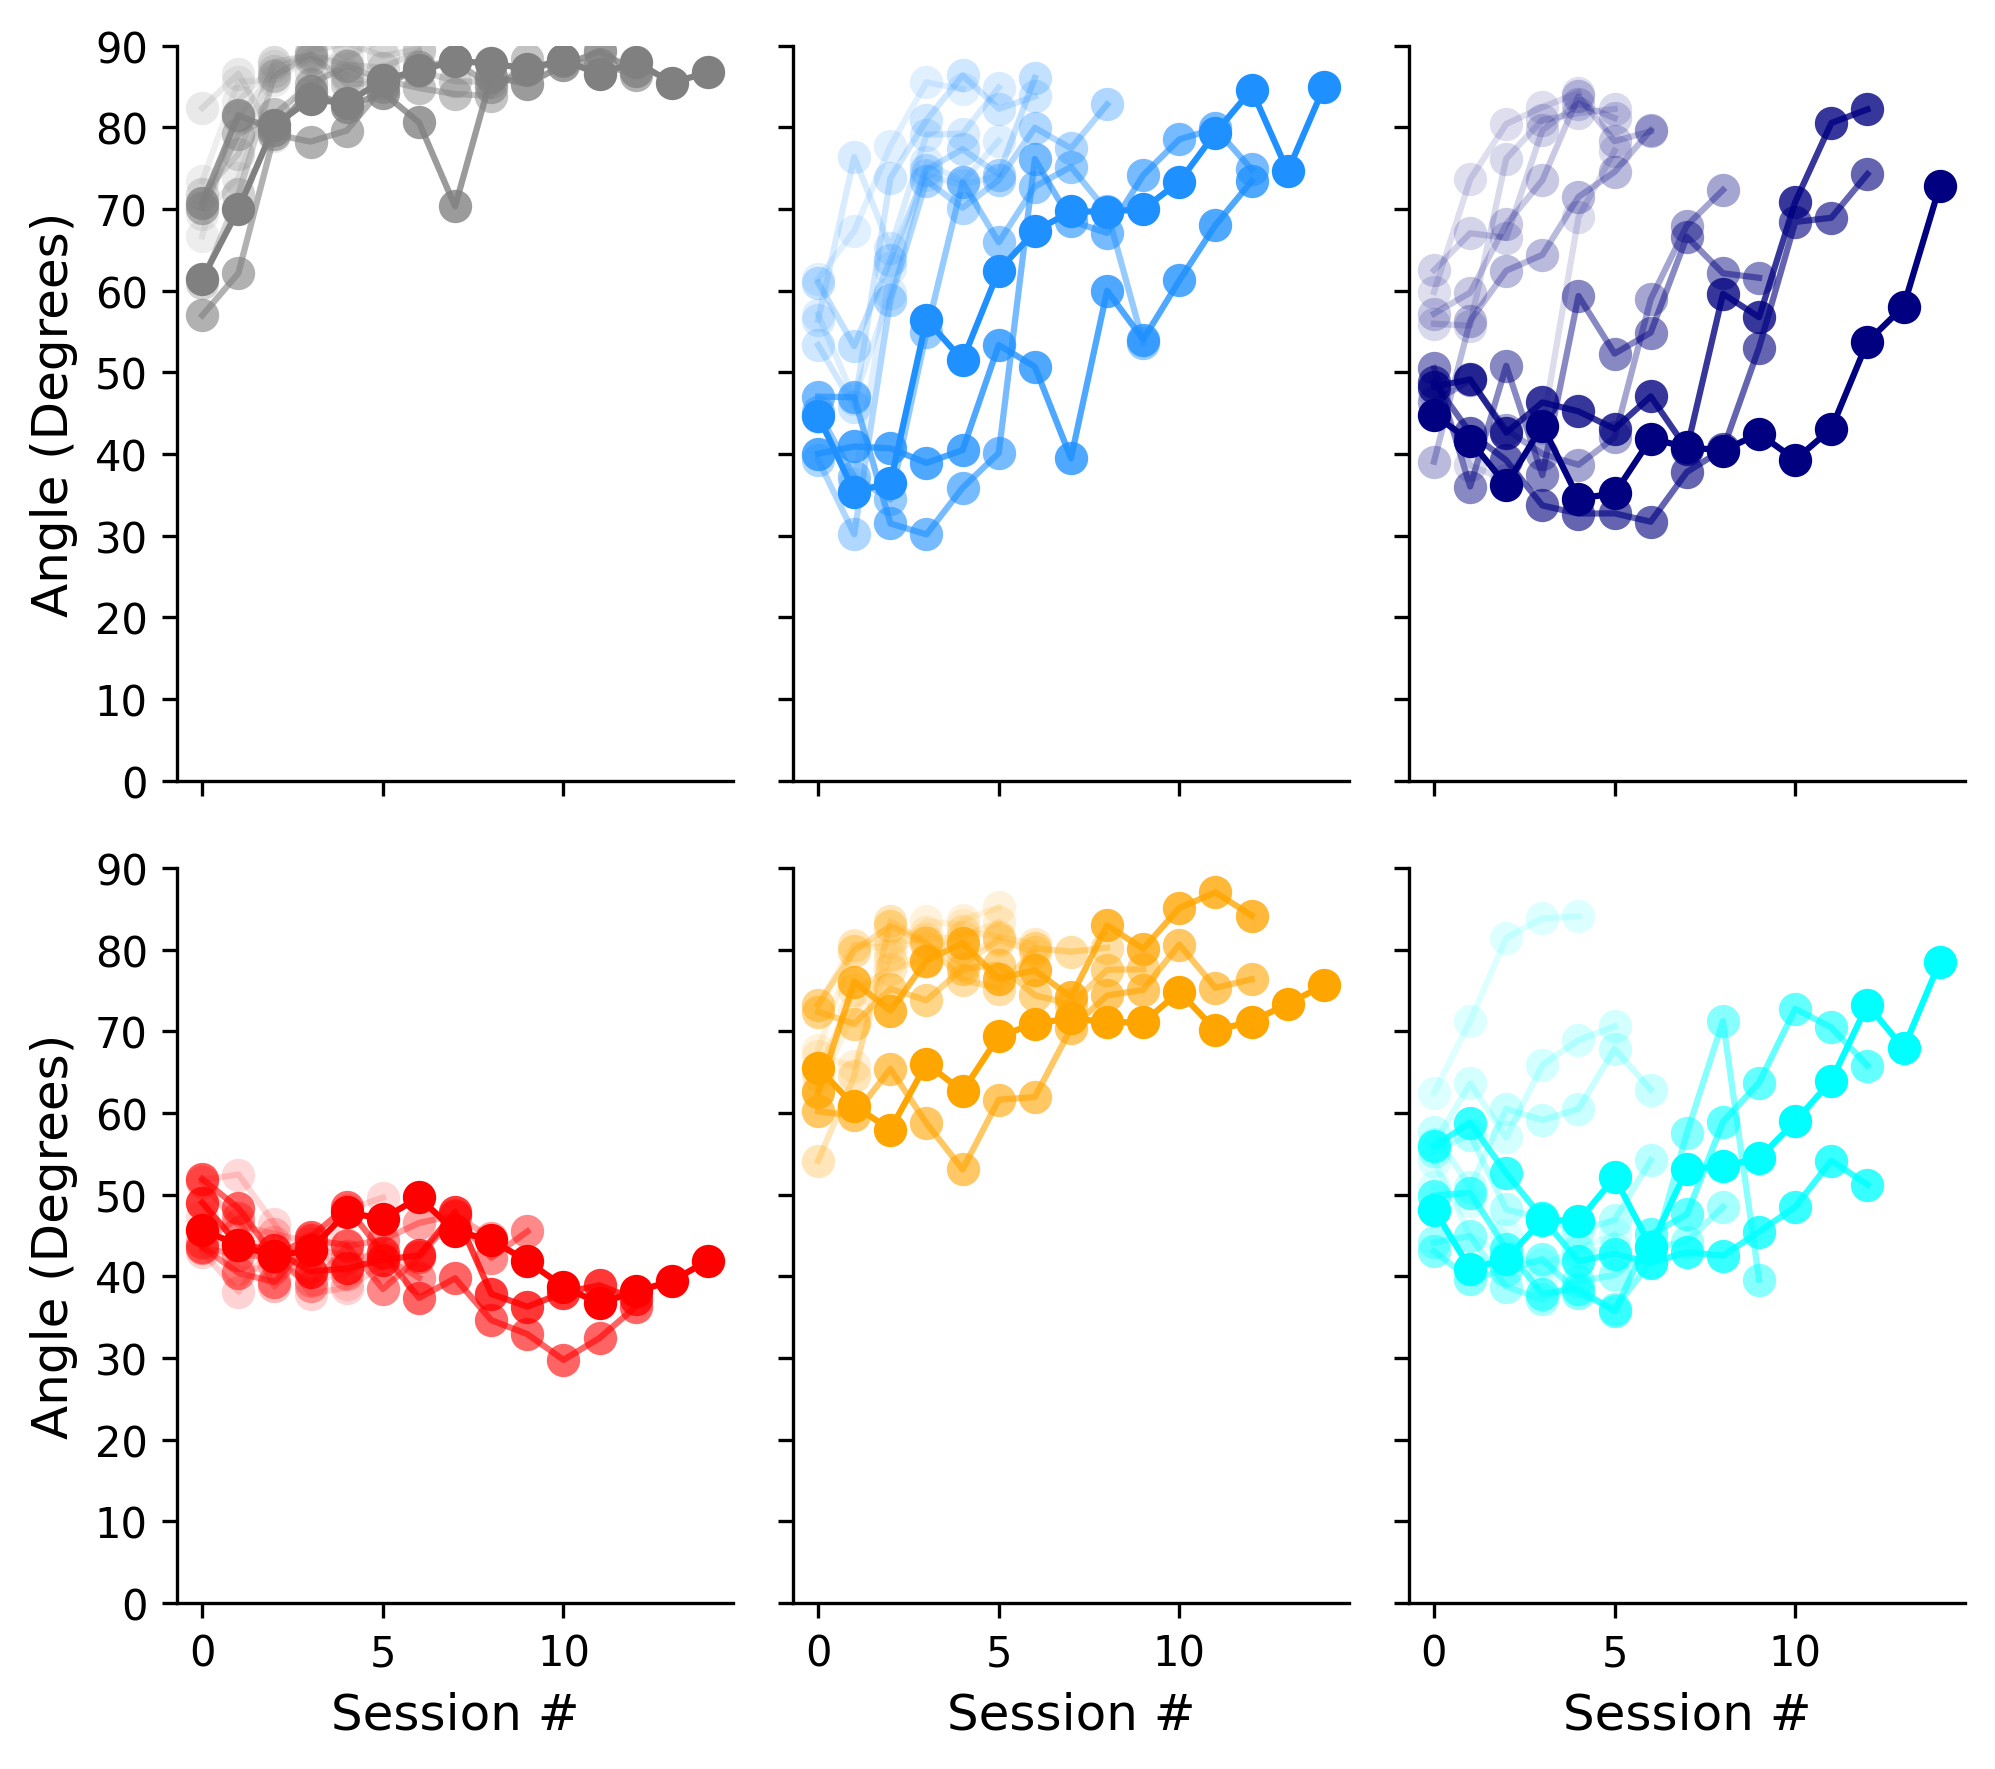

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import rankdata

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9*0.75, 6), dpi=300, sharex=True, sharey=True)

colors = ['gray','dodgerblue', 'navy', 'red', 'orange', 'cyan']

non_nan_lengths_1 = np.sum(~np.isnan(all_masks_matrix[0,:,:]), axis=1)
ranks = rankdata(non_nan_lengths_1, method='ordinal')  
non_nan_lengths_scaled_1 =  ((ranks / max(ranks))**3 + 0.15)/max((ranks / max(ranks))**3 + 0.15)

for i, mask in enumerate(cosine_angle_matrices_1): 
    for j, line in enumerate(all_masks_matrix[i,:,:]):
        color = colors[i]
        alpha = non_nan_lengths_scaled_1[j]
        axs[0, i].plot(line, 'o-', label=labels_1[i], color=color, alpha=alpha, markeredgecolor='none', markersize=8)

    axs[0, i].set_ylim([0, 90])
    axs[0, i].set_yticks(range(0, 100, 10))  # Set y-ticks
    if i == 0:
        axs[0, i].set_ylabel('Angle (Degrees)', fontsize=12) 
    axs[0, i].tick_params(axis='both', labelsize=10)
    axs[0, i].spines['top'].set_visible(False)
    axs[0, i].spines['right'].set_visible(False)

for i, mask in enumerate(cosine_angle_matrices_2): 
    for j, line in enumerate(all_masks_matrix[i+3,:,:]):
        color = colors[i+3]
        alpha = non_nan_lengths_scaled_1[j]
        axs[1, i].plot(line, 'o-', label=labels_2[i], color=color, alpha=alpha, markeredgecolor='none', markersize=8)

    axs[1, i].set_ylim([0, 90])
    axs[1, i].set_yticks(range(0, 100, 10))  # Set y-ticks
    axs[1, i].set_xlabel('Session #', fontsize=12)
    if i == 0:
        axs[1, i].set_ylabel('Angle (Degrees)', fontsize=12) 
    axs[1, i].tick_params(axis='both', labelsize=10)
    axs[1, i].spines['top'].set_visible(False)
    axs[1, i].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("Angle_Plots.pdf", format='pdf', dpi=500, bbox_inches='tight') 
plt.show()
